<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Time_Series_Analysis/blob/main/TSA_EXP_6_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARIMA**

Comparative Analysis of Autoregressive, Moving Average and Autoregressive Integrated Moving Average on a given dataset.

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel(r'/content/Country_GDP.xlsx', parse_dates = True)

In [ ]:
df.head(10)

,Time,GDP
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442
5,1948-04-01,2121.899
6,1948-07-01,2134.056
7,1948-10-01,2136.440
8,1949-01-01,2107.001
9,1949-04-01,2099.814


In [ ]:
df.tail()

,Time,GDP
296,2021-01-01,19055.655
297,2021-04-01,19368.310
298,2021-07-01,19478.893
299,2021-10-01,19806.290
300,2022-01-01,19735.895


In [ ]:
df.shape

(301, 2)

Perform Exploratory Data Analysis using line, histogram and kernel density estimation (KDE) of the closing price of the stocks. EDA is the process of using a graphical representation to discover and investigate patterns within data.

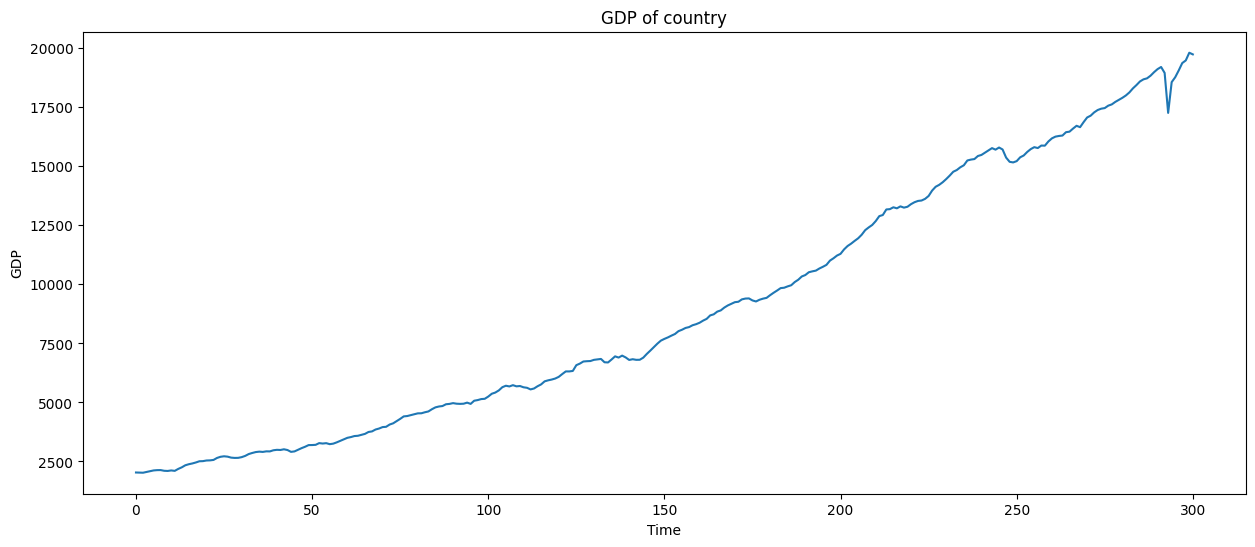

In [ ]:
df["GDP"].plot(figsize=(15, 6))
plt.xlabel("Time")
plt.ylabel("GDP")
plt.title("GDP of country")
plt.show()

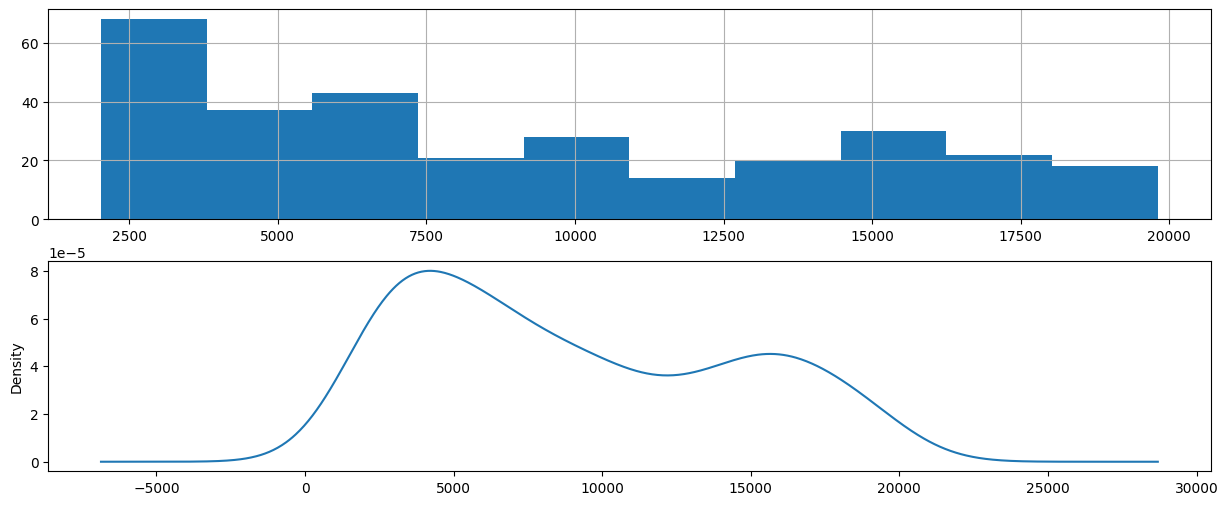

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["GDP"].hist()
plt.subplot(212)
df["GDP"].plot(kind='kde')
plt.show()

Define the TS evaluation function.

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

ADF test function to check for stationary data.

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['GDP' ],'GDP')

Results of Dickey-Fuller Test for column: GDP
Test Statistic                   2.684049
p-value                          0.999086
No Lags Used                     1.000000
Number of Observations Used    299.000000
Critical Value (1%)             -3.452411
Critical Value (5%)             -2.871255
Critical Value (10%)            -2.571947
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Close is non-stationary and auto-arima handles this internally.


Model training will be done only for the Close column from the dataset. Make a copy of the data and perform the test/train split.

The train will have all the data except the last 30 days and test will contain only the last 30 days to evaluate against predictions.

In [ ]:
X = df[['GDP' ]]
train, test = X[0:-80], X[-80:]

The pmdarima module will help us to identify p, d, q without the hassle of looking at the plot.

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2454.941, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2397.708, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2380.423, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2452.956, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2378.466, Time=0.33 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2370.631, Time=0.70 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2395.733, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2362.838, Time=1.00 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2393.187, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2364.255, Time=1.02 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2363.696, Time=1.78 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2366.5

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  221
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1177.419
Date:                Thu, 02 Nov 2023   AIC                           2362.838
Time:                        04:03:42   BIC                           2376.394
Sample:                             0   HQIC                          2368.313
                                - 221                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2381      0.066      3.593      0.000       0.108       0.368
ar.L2          0.2145      0.053      4.026      0.000       0.110       0.319
ma.L1         -0.9694      0.018    -55.301      0.000      -1.004      -0.935
sigma2      2715.0253    196.447     13.821      0.000    2329.995    3100.055
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=80,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['GDP_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(221, 301)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 278682.37905690435
MSE is : 445.9598259665854
RMSE is : 527.9037592752152
MAPE is : 2.6906074184730717
R2 is : 0.9030147772398933



In [ ]:
forecast["new_index"] = range(221, 301)
forecast = forecast.set_index("new_index")

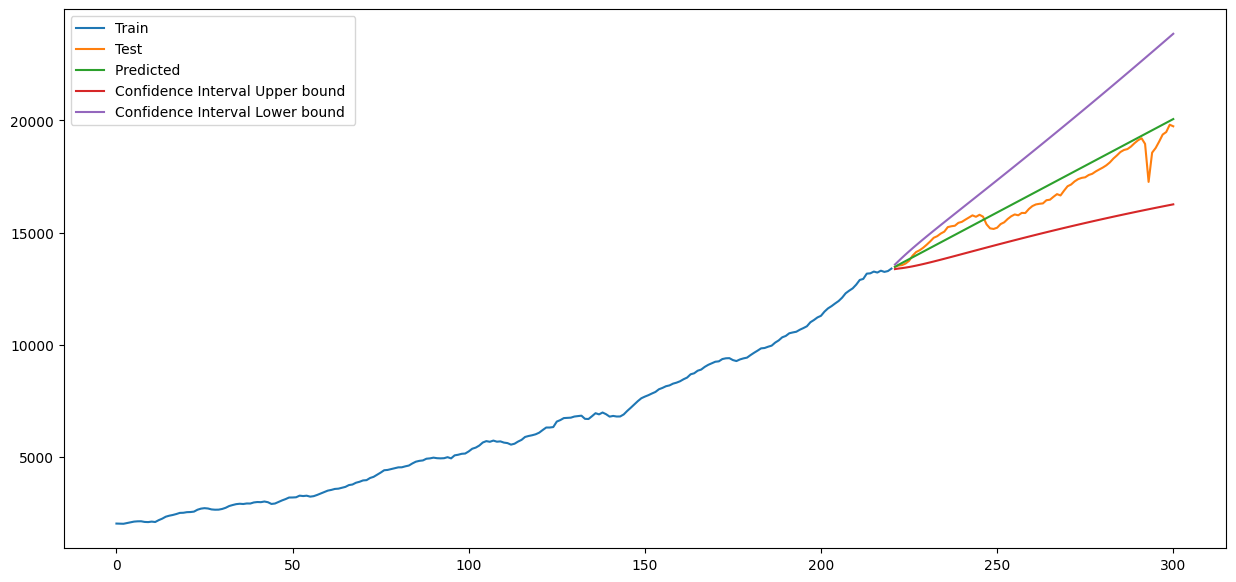

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

Plot the diagnostic Plot.

**Standardized Residual:** It's a measure of the strength of the difference between observed and expected values.

**Histogram plus estimated density:** KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

**Normal Q-Q:** Q-Q plots let you check that the data meet the assumption of normality. They compare the distribution of your data to a normal distribution by plotting the quartiles of your data against the quartiles of a normal distribution. If your data are normally distributed then they should form an approximately straight line.

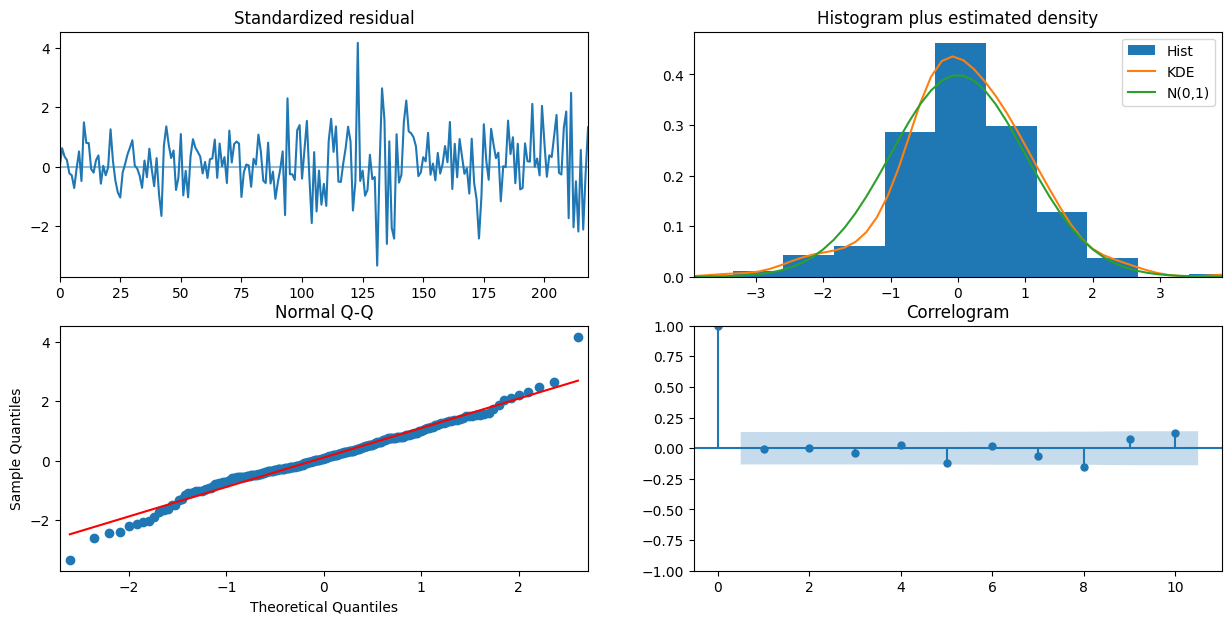

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
forecast

,GDP_pred
new_index,
221,13474.552445
222,13562.679235
223,13646.308759
224,13730.687218
225,13814.279410
...,...
296,19724.747235
297,19807.982801
298,19891.218367
